## 1 - Load Libraries and Data

In [1]:
import pandas as pd
import pandas_profiling as pp_eda
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

## 2 - Business Understanding

**Business Problem:** Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [3]:

data_train.shape

(891, 12)

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




```
# This is formatted as code
```

## 3 - Data Understanding
This dataset contains 891 entries and 12 attributes. A data dictionary is provided below to document known data and business context for these data

| Element or Variable Name | Data Type | Description | Acceptable Values | Required? | Accepts Null Values? | OKR? |
| --- | --- | --- | --- | --- | --- | --- |
| PassengerId | int64 | ID of Passenger | 1 to 891 | Yes | No | No |
| Survived | int64 | Survival | 0 = No, 1 = Yes | Yes | No | Yes |
| Pclass | int64 | Ticket class. A proxy for socio-economic status | 1 = 1st = Upper, 2 = 2nd = Middle, 3 = 3rd = Lower | Yes | No | No |
| Name | object | Name of Passenger | char | Yes | No | No |
| Sex | object | Sex of Passenger | male or female | Yes | No | No |
| Age | float64 | Age in Years | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5. Otherwise, whole number | No | Yes | No |
| SibSp | int64 | # of siblings / spouses aboard the Titanic. The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored) | 0 to inf | Yes | No | No |
| Parch | int64 | # of parents / children aboard the Titanic. The dataset defines family relations in this way...Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them. | 0 to inf | Yes | No | No |
| Ticket | object | Ticket number | char | Yes | No | No |
| Fare | float64 | Passenger fare | 0 to inf | Yes | No | No |
| Cabin | object | Cabin number | char | No | Yes | No |
| Embarked | object | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | No | Yes | No |


In [7]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data analysis**

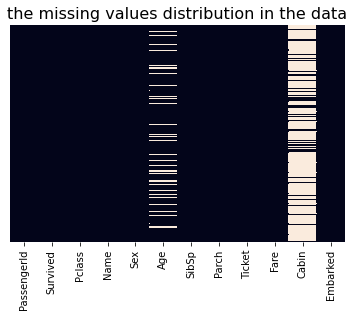

In [8]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False)

plt.title('the missing values distribution in the data',fontsize=16)
plt.show()

In [9]:
data_train=data_train.drop(labels=['Cabin'],axis=1)
data_test=data_test.drop(labels=['Cabin'],axis=1)

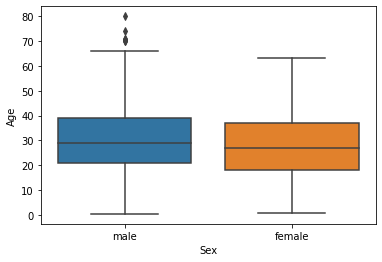

In [10]:
sns.boxplot(data=data_train,y='Age',x='Sex')

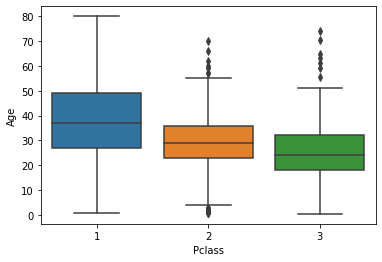

In [11]:
sns.boxplot(data=data_train,y='Age',x='Pclass')
#fig below shows that ages 

the figure shows that people with age around 38 tends to buy expensive ticket in the first class and people with age around 29 tend to buy tickets in the second class however people with age around 24 tend to buy cheater tickets

In [12]:
#use the above information to fill the null values for age
def f(x):
    Age=x[0]
    Pclass=x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
data_train['Age']=data_train[['Age','Pclass']].apply(f,axis=1)
data_test['Age']=data_test[['Age','Pclass']].apply(f,axis=1)

In [14]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
def sex(x):
  if x=='male':
    return 0
  else:
    return 1
  

In [16]:
data_train['Sex']=data_train['Sex'].map(sex)
data_test['Sex']=data_test['Sex'].map(sex)

In [17]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


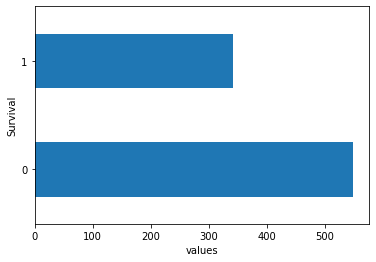

In [18]:
data_train['Survived'].value_counts().plot(kind='barh')
plt.xlabel('values')
plt.ylabel('Survival')
plt.show()

In [19]:
#Show a high level glimpse of the data
data_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.100079,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.265936,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## 4.3 - Additonal EDA
Based on SME judgement and insights from sections 4.1 and 4.2, additional EDA was performed to identify and create new features from the initial data. The following variables, described further in section 4.5, were created:

- Age group
- PLEASE ADD OTHER FEATURES

In [20]:
#Count Zeros and/or Special Values
#Count Nulls
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
#Count Zeros and/or Special Values
#Count of Zeros
(data_train == 0).sum()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex            577
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Embarked         0
dtype: int64

In [22]:
# make new feature age group
def age_group(x):
  if x<=20:
    return 0
  elif x>20 and x<=40:
    return 1
  elif x>=40 and x<=60:
    return 3
  else:
    return 4
  

In [23]:
data_train['Age_Group']=data_train['Age'].map(age_group)
data_test['Age_Group']=data_test['Age'].map(age_group)

In [24]:
data_train['Age_Group'].value_counts()

1    562
0    179
3    128
4     22
Name: Age_Group, dtype: int64

In [25]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,1


In [26]:
#encoding feature Embarked
def embk(x):
  if x=='S':
    return 0
  elif x=='C':
    return 1
  elif x=='Q':
    return 2

In [27]:
data_train['Embarked']=data_train['Embarked'].map(embk)
data_test['Embarked']=data_test['Embarked'].map(embk)

In [28]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,0.0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1.0,1


In [29]:
data_train=data_train.drop(columns=['PassengerId','Name','Ticket'])
data_test=data_test.drop(columns=['PassengerId','Name','Ticket'])

In [30]:
data_train=data_train.dropna()

In [31]:
data_train_x=data_train.drop(['Survived'],axis=1)
data_train_y=data_train['Survived']

In [32]:
data_train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,3,0,22.0,1,0,7.2500,0.0,1
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,0.0,1
3,1,1,35.0,1,0,53.1000,0.0,1
4,3,0,35.0,0,0,8.0500,0.0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0.0,1
887,1,1,19.0,0,0,30.0000,0.0,0
888,3,1,24.0,1,2,23.4500,0.0,1
889,1,0,26.0,0,0,30.0000,1.0,1


In [33]:
data_train_x.isna().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Age_Group    0
dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train_x= scaler.fit_transform(data_train_x)


In [35]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from matplotlib import pyplot as plt

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(data_train_x,data_train_y,test_size=0.3)

**Models**

**logistic regression**

ACCURACY =  : 0.8427
error =  0.1573033707865169


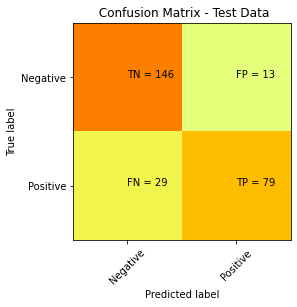

Sensivity = 0.9182389937106918
Specificity = 0.7314814814814815


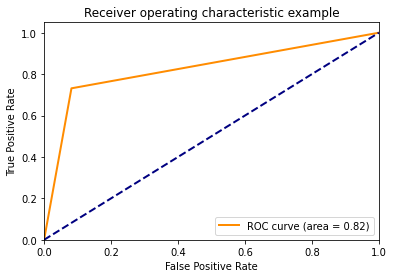

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       159
           1       0.86      0.73      0.79       108

    accuracy                           0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267

CPU times: user 293 ms, sys: 10.4 ms, total: 304 ms
Wall time: 303 ms


In [37]:
%%time
from sklearn.linear_model import LogisticRegression

LG_model = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
y_predi = LG_model.fit(X_train, y_train)
y_predi=LG_model.predict(X_test)
a=1-accuracy_score(y_test, y_predi)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('ACCURACY =  : {0:0.4f}'. format(accuracy_score(y_test, y_predi)))
print('error = ',a)
from sklearn.metrics import confusion_matrix
import numpy as np
cm= confusion_matrix(y_test, y_predi)

#print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title(' Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
print('Sensivity =',TPR)
print('Specificity =',TNR)
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_predi)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(classification_report(y_test, y_predi))

**XGB classifier**

ACCURACY =  : 0.8652
error =  0.1348314606741573


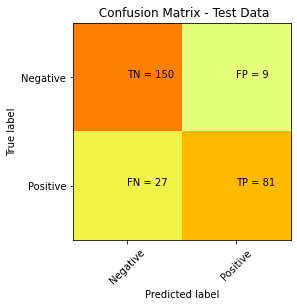

Sensivity = 0.9433962264150944
Specificity = 0.75


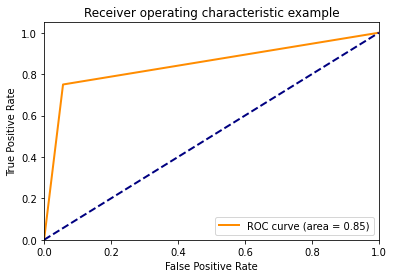

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       159
           1       0.90      0.75      0.82       108

    accuracy                           0.87       267
   macro avg       0.87      0.85      0.86       267
weighted avg       0.87      0.87      0.86       267

CPU times: user 338 ms, sys: 23.4 ms, total: 362 ms
Wall time: 372 ms


In [38]:
%%time
from xgboost import XGBClassifier

XGB_model = XGBClassifier(use_label_encoder=False )
y_predi = XGB_model.fit(X_train, y_train)
y_predi=XGB_model.predict(X_test)
a=1-accuracy_score(y_test, y_predi)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('ACCURACY =  : {0:0.4f}'. format(accuracy_score(y_test, y_predi)))
print('error = ',a)
from sklearn.metrics import confusion_matrix
import numpy as np
cm= confusion_matrix(y_test, y_predi)

#print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title(' Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
print('Sensivity =',TPR)
print('Specificity =',TNR)
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_predi)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(classification_report(y_test, y_predi))

**Random forest Classifier**

ACCURACY  =  : 0.8202
error =  0.1797752808988764


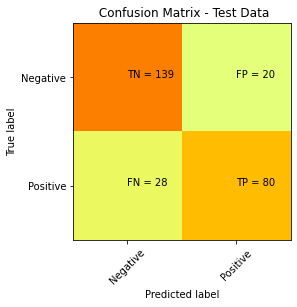

Sensivity = 0.8742138364779874
Specificity = 0.7407407407407407


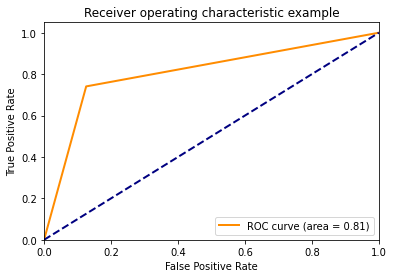

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.80      0.74      0.77       108

    accuracy                           0.82       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

CPU times: user 519 ms, sys: 17 ms, total: 536 ms
Wall time: 546 ms


In [39]:
%%time
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
y_predi = RF_model.fit(X_train, y_train)
y_predi=RF_model.predict(X_test)
a=1-accuracy_score(y_test, y_predi)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('ACCURACY  =  : {0:0.4f}'. format(accuracy_score(y_test, y_predi)))
print('error = ',a)
from sklearn.metrics import confusion_matrix
import numpy as np
cm= confusion_matrix(y_test, y_predi)

#print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title(' Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
print('Sensivity =',TPR)
print('Specificity =',TNR)
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_predi)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(classification_report(y_test, y_predi))